[back](./00-index.ipynb)

---

### `Initial Setup`

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns  # Library used to print nicer charts and visualizations
import matplotlib.pyplot as plt

%matplotlib inline


refer [here](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline) to know about `%matplotlib inline`

In [2]:
df = pd.read_csv(r'../../assets/single_family_home_values.csv')
df.head(4)


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073


### `Cleaning Data`

#### `Understanding the DataFrame`

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# Shape of the DataFrame
# Prints the number of rows and columns
df.shape

(15000, 18)

In [5]:
# Info of the DataFrame
# Can know the number of missing values for each column
# Can understand the data-type of the elements in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [6]:
# Have statistics of the DataFrame
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [7]:
# Fill NaN values
df2 = df.fillna(0)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    15000 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [8]:
# Instead of filling with 0, we might want to fill it with the mean of each column
df3 = df.fillna(df.mean())
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

/Users/goutham/opt/anaconda3/envs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
# Drop all NaN values
# df = df.dropna() # Drop NaN values and assign it back to df

# Another way of doing the same
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11078 non-null  int64  
 1   address          11078 non-null  object 
 2   city             11078 non-null  object 
 3   state            11078 non-null  object 
 4   zipcode          11078 non-null  int64  
 5   latitude         11078 non-null  float64
 6   longitude        11078 non-null  float64
 7   bedrooms         11078 non-null  int64  
 8   bathrooms        11078 non-null  float64
 9   rooms            11078 non-null  int64  
 10  squareFootage    11078 non-null  int64  
 11  lotSize          11078 non-null  int64  
 12  yearBuilt        11078 non-null  float64
 13  lastSaleDate     11078 non-null  object 
 14  lastSaleAmount   11078 non-null  int64  
 15  priorSaleDate    11078 non-null  object 
 16  priorSaleAmount  11078 non-null  float64
 17  estimated_va

#### `Understanding the DataFrame - More`

<AxesSubplot:xlabel='estimated_value'>

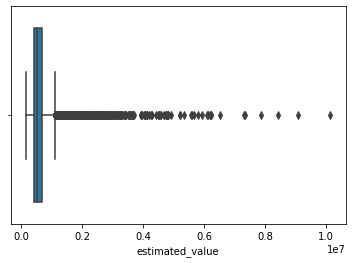

In [10]:
# Knowing the outliers
sns.boxplot(x=df.estimated_value)


We see that there are some outliers and we can try and remove values those are **> 800000** _(because the value is actually 1e7)_ to remove some of the outliers in the DataFrame

In [11]:
# Trying to eliminate the outliers

df[df.estimated_value <= 800000].shape

(9456, 18)

<AxesSubplot:xlabel='estimated_value'>

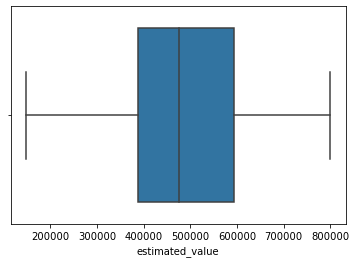

In [12]:
sns.boxplot(x=df[df.estimated_value <= 800000].estimated_value)


We will set **1000000** as a cutoff and use it as the limit to eliminate the outliers

In [13]:
df = df[df.estimated_value <= 1000000]
df.shape

(10080, 18)

<AxesSubplot:xlabel='estimated_value'>

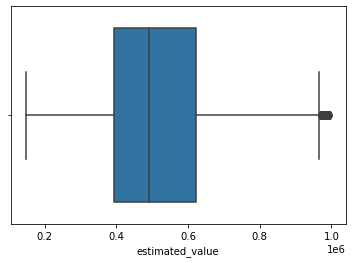

In [14]:
sns.boxplot(x=df.estimated_value)

<AxesSubplot:>

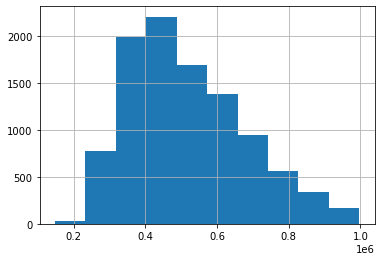

In [15]:
df.estimated_value.hist()

#### `Filtering out noise`

In [16]:
# Get data to help using for filtering
df.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

In [17]:
# Format to filter / slice data, with multiple conditions
# df[(df.estimated_value<=1000000) & (cond2) & (cond3)]
# df[((df.estimated_value <= 1000000) | (df.yearBuilt > 2000)) & (df.zipcode == 80209)]

df[(df.estimated_value <= 1000000) & (df.yearBuilt > 2013) & (df.zipcode == 80209)]


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
13812,39708952,611 S Washington St,Denver,CO,80209,39.705403,-104.979580,3,4.0,10,2090,4690,2014.0,2015-03-09,825000,2013-07-19,325500.0,994114
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,2006-05-11,511000.0,869769
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


### `Statistics`

What if we want to look at the correlation or the relationships between different columns

One way of doing it using `Seaborn`'s **pairplot**

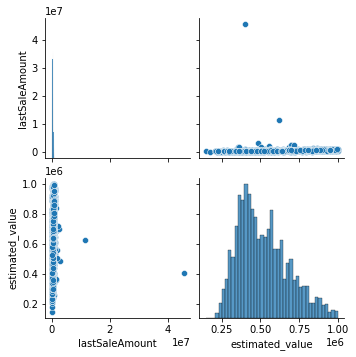

In [18]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value']], palette='Spectral')

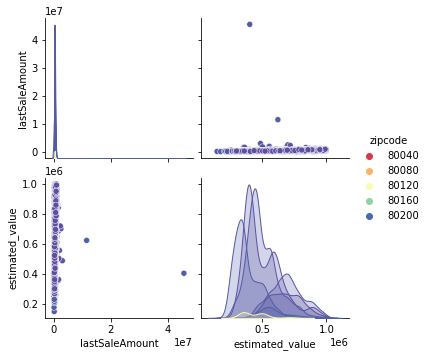

In [19]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode', palette='Spectral')


In [20]:
df[df.lastSaleAmount<=1000000]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,23766957,421 S Washington St,Denver,CO,80209,39.708869,-104.979540,2,2.0,6,1145,4690,1924.0,2008-07-08,385000,1998-01-30,182900.0,629031
14990,4511745,255 S Downing St,Denver,CO,80209,39.711870,-104.973735,2,2.0,5,1401,4690,1910.0,2009-10-06,385000,2005-08-03,360000.0,638952
14993,42985979,1016 S Emerson St,Denver,CO,80209,39.698090,-104.976608,3,2.0,6,1913,4760,1909.0,2017-05-31,600000,2013-06-07,535000.0,694981
14994,150304831,376 S High St,Denver,CO,80209,39.709681,-104.964860,3,2.0,7,1913,4990,1925.0,2015-09-10,815000,1994-05-06,142000.0,784955


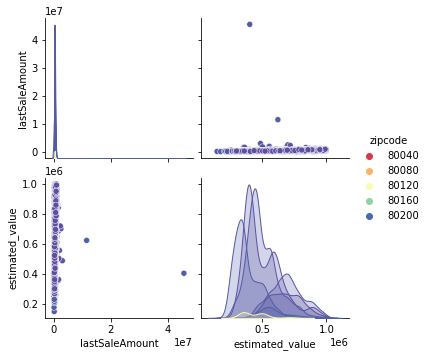

In [21]:
sns.pairplot(
    df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode', palette='Spectral')


<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

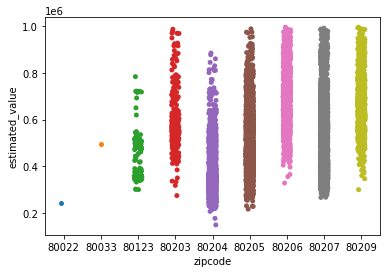

In [22]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

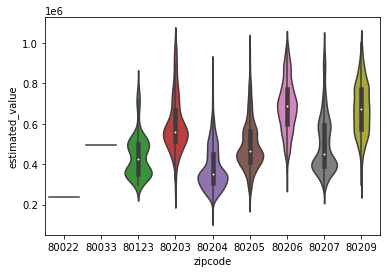

In [23]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)


Currently **lastSaleDate** and **priorSaleDate** (data) is in a string format (object) and we might want to convert it to **date time format**

And `Pandas` can help achieve this easily

In [24]:
df.lastSaleDate = pd.to_datetime(df.lastSaleDate)
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10080 non-null  int64         
 1   address          10080 non-null  object        
 2   city             10080 non-null  object        
 3   state            10080 non-null  object        
 4   zipcode          10080 non-null  int64         
 5   latitude         10080 non-null  float64       
 6   longitude        10080 non-null  float64       
 7   bedrooms         10080 non-null  int64         
 8   bathrooms        10080 non-null  float64       
 9   rooms            10080 non-null  int64         
 10  squareFootage    10080 non-null  int64         
 11  lotSize          10080 non-null  int64         
 12  yearBuilt        10080 non-null  float64       
 13  lastSaleDate     10080 non-null  datetime64[ns]
 14  lastSaleAmount   10080 non-null  int64

Now that we have the date types converted from String to DateTime, we can do the following

In [26]:
df.lastSaleDate.dt.year

0        2009
3        2008
4        2012
5        2006
6        2014
         ... 
14989    2008
14990    2009
14993    2017
14994    2015
14996    2015
Name: lastSaleDate, Length: 10080, dtype: int64

In [27]:
df.lastSaleDate.dt.month

0        12
3        12
4         7
5         9
6        12
         ..
14989     7
14990    10
14993     5
14994     9
14996     3
Name: lastSaleDate, Length: 10080, dtype: int64

In [28]:
df.lastSaleDate.dt.weekday

0        3
3        1
4        2
5        1
6        0
        ..
14989    1
14990    1
14993    2
14994    3
14996    3
Name: lastSaleDate, Length: 10080, dtype: int64

In [29]:
df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday

In [30]:
df.head(4)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,weekday_priorSaleDate,weekday_lastSaleDate
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,3,3
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,4,1
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,3,2
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,0,1


In [31]:
df['year_lastSaleDate'] = df.lastSaleDate.dt.year
df['year_priorSaleDate'] = df.priorSaleDate.dt.year
df.head(4)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,weekday_priorSaleDate,weekday_lastSaleDate,year_lastSaleDate,year_priorSaleDate
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,...,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,3,3,2009,2004
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,...,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,4,1,2008,2008
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,...,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,3,2,2012,2011
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,...,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,0,1,2006,2005


In [32]:
df['year_between_lastSale'] = df.year_lastSaleDate - df.year_priorSaleDate
df.head(4)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,weekday_priorSaleDate,weekday_lastSaleDate,year_lastSaleDate,year_priorSaleDate,year_between_lastSale
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,...,2009-12-17,75000,2004-05-13,165700.0,239753,3,3,2009,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,...,2008-12-02,185000,2008-06-27,0.0,494073,4,1,2008,2008,0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,...,2012-07-18,308000,2011-12-29,0.0,513676,3,2,2012,2011,1
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,...,2006-09-12,363500,2005-05-16,339000.0,496062,0,1,2006,2005,1



---
Displaying the correlation of a DataFrame, applies to numerical columns

In [33]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,weekday_priorSaleDate,weekday_lastSaleDate,year_lastSaleDate,year_priorSaleDate,year_between_lastSale
id,1.000000,-0.010738,-0.048857,0.048612,0.040073,0.109553,0.055079,0.098630,-0.018843,-0.005683,0.080936,0.014443,0.155242,0.019297,-0.002359,0.218011,-0.041562,0.198056
zipcode,-0.010738,1.000000,0.525664,0.391521,-0.046612,-0.079709,-0.003444,-0.087133,-0.074882,-0.225928,0.021791,0.010719,0.109972,-0.020284,-0.003557,0.028944,0.032686,-0.011973
latitude,-0.048857,0.525664,1.000000,0.548275,-0.017591,-0.098119,-0.125624,-0.138312,0.027107,-0.009182,-0.070974,-0.206421,-0.199005,-0.023193,-0.011990,0.047873,0.119592,-0.085440
longitude,0.048612,0.391521,0.548275,1.000000,-0.000365,0.098343,-0.011106,0.027918,0.106820,0.070313,0.049801,0.153947,0.234867,-0.016098,-0.006745,0.039253,0.042612,-0.014518
bedrooms,0.040073,-0.046612,-0.017591,-0.000365,1.000000,0.416741,0.676622,0.651856,-0.015604,-0.130463,0.068821,0.137372,0.358154,-0.025703,0.005290,-0.012779,-0.020316,0.011180
bathrooms,0.109553,-0.079709,-0.098119,0.098343,0.416741,1.000000,0.550545,0.665222,-0.013431,-0.013842,0.164183,0.342366,0.652591,-0.026047,-0.003387,0.070314,0.057723,-0.007367
rooms,0.055079,-0.003444,-0.125624,-0.011106,0.676622,0.550545,1.000000,0.732308,-0.117461,-0.251573,0.138688,0.281002,0.581398,-0.029045,0.020109,-0.035527,-0.078523,0.053161
squareFootage,0.098630,-0.087133,-0.138312,0.027918,0.651856,0.665222,0.732308,1.000000,-0.045825,-0.189324,0.165884,0.332731,0.690945,-0.017310,0.002161,-0.004980,-0.077565,0.074120
lotSize,-0.018843,-0.074882,0.027107,0.106820,-0.015604,-0.013431,-0.117461,-0.045825,1.000000,0.459040,-0.026325,-0.047049,-0.072603,0.003134,0.007123,-0.006893,0.031988,-0.036986
yearBuilt,-0.005683,-0.225928,-0.009182,0.070313,-0.130463,-0.013842,-0.251573,-0.189324,0.459040,1.000000,-0.063830,-0.113654,-0.255941,0.011164,-0.004999,0.028454,0.064898,-0.044590


In [34]:
df.corr().loc['estimated_value', :]

id                       0.155242
zipcode                  0.109972
latitude                -0.199005
longitude                0.234867
bedrooms                 0.358154
bathrooms                0.652591
rooms                    0.581398
squareFootage            0.690945
lotSize                 -0.072603
yearBuilt               -0.255941
lastSaleAmount           0.258833
priorSaleAmount          0.566327
estimated_value          1.000000
weekday_priorSaleDate   -0.013685
weekday_lastSaleDate     0.000469
year_lastSaleDate        0.042969
year_priorSaleDate      -0.058554
year_between_lastSale    0.089481
Name: estimated_value, dtype: float64

In [35]:
df.corr().loc['estimated_value', :].sort_values(ascending=False)

estimated_value          1.000000
squareFootage            0.690945
bathrooms                0.652591
rooms                    0.581398
priorSaleAmount          0.566327
bedrooms                 0.358154
lastSaleAmount           0.258833
longitude                0.234867
id                       0.155242
zipcode                  0.109972
year_between_lastSale    0.089481
year_lastSaleDate        0.042969
weekday_lastSaleDate     0.000469
weekday_priorSaleDate   -0.013685
year_priorSaleDate      -0.058554
lotSize                 -0.072603
latitude                -0.199005
yearBuilt               -0.255941
Name: estimated_value, dtype: float64


---
[next](./02-practical-datamining-example.ipynb)